# CVS Web Scraper
Author: Stephen Kita

Date: 21 July 2020

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import time
import random

## Initialize Global Variables

In [ ]:
my_header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'}
base_url = 'https://www.cvs.com/store-locator/cvs-pharmacy-locations/'
df_cvs = pd.DataFrame(columns=('state', 'town', 'count'))
states = ["Arkansas", "Arizona", "California", "Colorado", "Connecticut", 
          "Delaware", "District-of-Columbia", "Florida", "Georgia", "Hawaii", 
          "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", 
          "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", 
          "Mississippi", "Montana", "Nebraska", "Nevada", "New-Hampshire", "New-Jersey", 
          "New-Mexico", "New-York", "North-Carolina", "North-Dakota", "Ohio", "Oklahoma", 
          "Oregon", "Pennsylvania", "Puerto-Rico", "Rhode-Island", "South-Carolina", 
          "South-Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont",
          "Washington", "West-Virginia", "Wisconsin", "Wyoming"]

## Scrape Website and Save to CSV

In [ ]:
for state in states:
    url = base_url + state
    response = requests.get(url, headers=my_header)
    
    if response.ok:
        print(f'Scraping {state}...')
        text = BeautifulSoup(response.text, 'html.parser')
        text_towns = text.find('div', 'states').select('li')
        for town_seq in text_towns:
            town_seq = town_seq.get_text().strip()
            town = ' '.join(re.findall('\w*[a-z]', town_seq))
            count = int(re.findall('\w*\d+', town_seq)[0])
            df_cvs = df_cvs.append({'state': state,'town': town,'count': count}, ignore_index=True)
        print('... complete')
    else:
        print('#'*50)
        print(f'Failed to scrape {state}')
        print('#'*50)

    time.sleep(random.randint(5,10))

df_cvs['state'] = df_cvs['state'].str.replace('-',' ')
df_cvs.to_csv('csv-locs.csv', index=False)
print('Writing to .csv complete!')

In [181]:
df_cvs.to_csv('csv-locs.csv', index=False)

## Load CSV and Perform EDA

In [182]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import figure
plt.style.use('ggplot')
%matplotlib inline
df_cvs = pd.read_csv('csv-locs.csv')
df_cvs.head()

,state,town,count
0,Alaska,Anchorage,2
1,Alaska,Wasilla,2
2,Alabama,Alabaster,2
3,Alabama,Albertville,1
4,Alabama,Aliceville,1


In [183]:
df_states = df_cvs.groupby('state').agg({'count':['count','sum','mean','std']})['count'].sort_values('sum', ascending=False)
df_states.head()

,count,sum,mean,std
state,,,,
California,398,1175,2.952261,4.255118
Florida,267,874,3.273408,6.658998
Texas,280,843,3.010714,7.614589
New York,293,572,1.952218,4.080244
Pennsylvania,278,487,1.751799,3.911417
Massachusetts,217,416,1.917051,2.154353
Illinois,210,389,1.852381,4.857010
Ohio,221,389,1.760181,2.822225
North Carolina,170,369,2.170588,3.690747


Text(0.5, 1.0, 'CVS Stores per State')

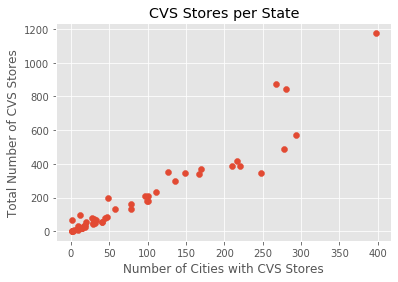

In [99]:
plt.scatter(df_states['count'], df_states['sum'])
plt.xlabel('Number of Cities with CVS Stores')
plt.ylabel('Total Number of CVS Stores')
plt.title('CVS Stores per State')

Six states are below the trendline. Create another graph to examine more closely.

Text(0.5, 1.0, 'CVS Stores per State')

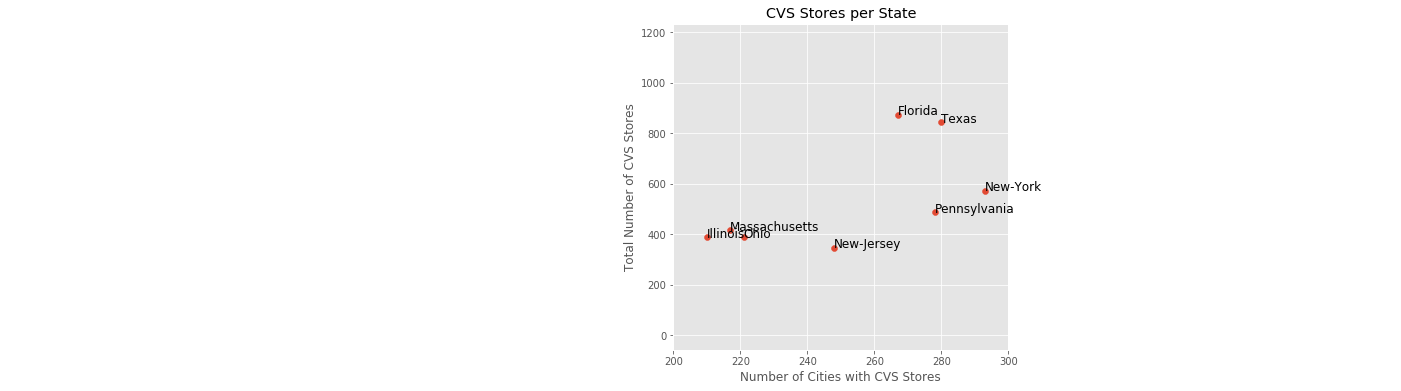

In [142]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(xmin=200,xmax=300)
ax.scatter(df_states['count'], df_states['sum'])
for i, txt in enumerate(df_states.index):
    ax.annotate(txt, (df_states['count'][i], df_states['sum'][i]),   # annotations throw off scaling
               size=12)
# ax.margins(x=-.3,y=-.3)   # save for later
plt.xlabel('Number of Cities with CVS Stores')
plt.ylabel('Total Number of CVS Stores')
plt.title('CVS Stores per State')

**OBSERVATION:** Something is going on with IL, MA, OH, NJ, PA, and NY where the number of CVS stores is lower than expected

Compare stores per state with state populations (2019 census estimates)

In [ ]:
df_states_pop = pd.read_csv('state-pops.csv')
df_states_pop['State'] = df_states_pop['State'].str.strip('.')
df_states = pd.merge(df_states_pop,df_states,left_on='State',right_on='state')

In [213]:
df_states.sort_values('Pop',ascending=False,inplace=True,ignore_index=True)

In [214]:
df_states

,State,Pop,count,sum,mean,std
0,California,39512223,398,1175,2.952261,4.255118
1,Texas,28995881,280,843,3.010714,7.614589
2,Florida,21477737,267,874,3.273408,6.658998
3,New York,19453561,293,572,1.952218,4.080244
4,Pennsylvania,12801989,278,487,1.751799,3.911417
5,Illinois,12671821,210,389,1.852381,4.857010
6,Ohio,11689100,221,389,1.760181,2.822225
7,Georgia,10617423,149,348,2.335570,3.439851
8,North Carolina,10488084,170,369,2.170588,3.690747
9,Michigan,9986857,136,301,2.213235,2.554323


In [221]:
df_states['mean'].loc[49] = None    # Clean District of Columbia

D:\Software\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5, 1.0, 'CVS Stores per State by Population')

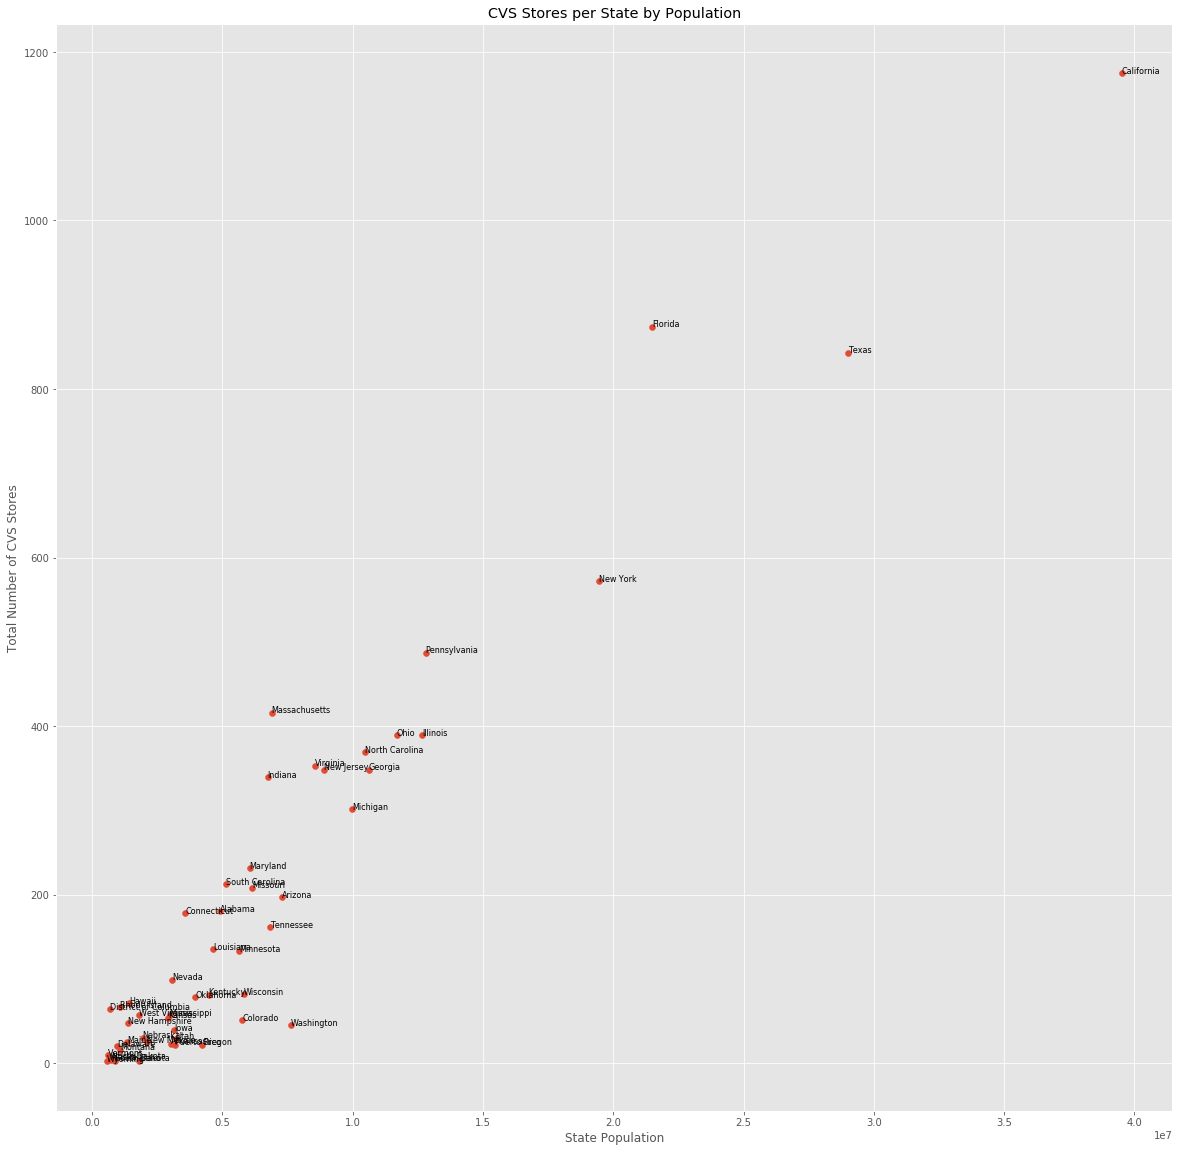

In [215]:
fig, ax = plt.subplots(figsize=(20,20))
plt.scatter(df_states['Pop'], df_states['sum'])
for i, txt in enumerate(df_states.State):
    ax.annotate(txt, (df_states['Pop'][i], df_states['sum'][i]),   # annotations throw off scaling
               size=8)

plt.xlabel('State Population')
plt.ylabel('Total Number of CVS Stores')
plt.title('CVS Stores per State by Population')

Linear regression in MS Excel, trendline: y = 3E-05 * x, R² = 0.9153. Equivalent to 1 CVS per 33,333 people.

Group data by CVS count under/over expected demand.

In [233]:
df_states['under'] = ((df_states['sum'] / df_states['Pop']) < 3E-5)
df_states['under_count'] = df_states['under'] * (round(df_states['Pop']/33333) - df_states['sum'])
df_states.head()

,State,Pop,count,sum,mean,std,under_count
0,California,39512223,398,1175,2.952261,4.255118,True
1,Texas,28995881,280,843,3.010714,7.614589,True
2,Florida,21477737,267,874,3.273408,6.658998,False
3,New York,19453561,293,572,1.952218,4.080244,True
4,Pennsylvania,12801989,278,487,1.751799,3.911417,False


Question: for states that have less stores per capita, should cvs expand to new cities or add more per city?

In [305]:
df_cities_pop = pd.read_csv('city-pops.csv')
df_cities_pop.State = df_cities_pop.State.str.strip()
df_cities = pd.merge(df_cities_pop, df_cvs, left_on=['State','City'], right_on=['state','town'])
df_cities.drop(['state','town'], axis=1, inplace=True)
df_cities.sort_values('City-Pop',ascending=False,inplace=True,ignore_index=True)
df_cities

,State,City,City-Pop,count
0,New York,New York,8336817,59
1,California,Los Angeles,3979576,57
2,Illinois,Chicago,2693976,70
3,Texas,Houston,2320268,91
4,Arizona,Phoenix,1680992,44
...,...,...,...,...
661,Ohio,Lakewood,49678,2
662,New York,Troy,49154,3
663,Michigan,Saginaw,48115,1
664,New York,Niagara Falls,47720,2


Text(0.5, 1.0, 'CVS Stores per City by Population')

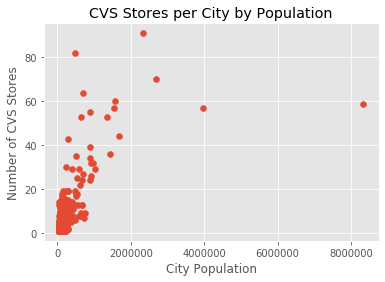

In [306]:
plt.scatter(df_cities['City-Pop'], df_cities['count'])
plt.xlabel('City Population')
plt.ylabel('Number of CVS Stores')
plt.title('CVS Stores per City by Population')

Linear regression in MS Excel, trendline is the same as the states: y = 3E-05 * x, R² = 0.9153. Equivalent to 1 CVS per 33,333 people.

Group cities by CVS count under/over expected demand.

In [328]:
df_cities['under'] = ((df_cities['count'] / df_cities['City-Pop']) < 3E-5)
df_cities['under_count'] = df_cities['under'] * (round(df_cities['City-Pop']/33333) - df_cities['count'])

In [358]:
df_cities.rename({'City-Pop':'city_pop'},axis=1,inplace=True)

In [359]:
df_cities.head()

,State,City,city_pop,city_cvs_count,under,city_under_count
0,New York,New York,8336817,59,True,191.0
1,California,Los Angeles,3979576,57,True,62.0
2,Illinois,Chicago,2693976,70,True,11.0
3,Texas,Houston,2320268,91,False,-0.0
4,Arizona,Phoenix,1680992,44,True,6.0


In [356]:
df_states.rename({'Pop':'state_pop'},axis=1,inplace=True)

In [357]:
df_states.head()

,State,state_pop,city_count,state_cvs_count,mean,under,state_under_count
0,California,39512223,398,1175,2.952261,True,10.0
1,Texas,28995881,280,843,3.010714,True,27.0
2,Florida,21477737,267,874,3.273408,False,-0.0
3,New York,19453561,293,572,1.952218,True,12.0
4,Pennsylvania,12801989,278,487,1.751799,False,-0.0


In [369]:
df_cities[df_cities['State']=='Mississippi']

,State,City,city_pop,city_cvs_count,under,city_under_count
144,Mississippi,Jackson,160628,5,False,0.0
451,Mississippi,Gulfport,71705,3,False,-0.0
594,Mississippi,Southaven,55780,3,False,-0.0


In [362]:
df_cvs_under = pd.merge(df_states[df_states['under']], df_cities[df_cities['under']], on=['State','under'])
df_cvs_under.drop(['mean','under'],axis=1,inplace=True)
df_cvs_under

,State,state_pop,city_count,state_cvs_count,state_under_count,City,city_pop,city_cvs_count,city_under_count
0,California,39512223,398,1175,10.0,Los Angeles,3979576,57,62.0
1,California,39512223,398,1175,10.0,San Diego,1423851,36,7.0
2,California,39512223,398,1175,10.0,San Jose,1021795,29,2.0
3,California,39512223,398,1175,10.0,San Francisco,881549,24,2.0
4,California,39512223,398,1175,10.0,Long Beach,462628,13,1.0
...,...,...,...,...,...,...,...,...,...
181,North Dakota,762062,4,6,17.0,Bismarck,73529,2,0.0
182,North Dakota,762062,4,6,17.0,Grand Forks,55839,1,1.0
183,Alaska,731545,2,4,18.0,Anchorage,288000,2,7.0
184,Wyoming,578759,2,2,15.0,Cheyenne,64235,1,1.0


In [376]:
x = pd.merge(df_states, df_cvs_under.groupby('State').agg({'city_under_count':'sum'}), on='State')

In [379]:
x = x.append(df_states[df_states['under']==True]).drop_duplicates('State')

In [391]:
x[x['city_under_count'].isna()].assign(city_under_count=0)

,State,state_pop,city_count,state_cvs_count,mean,under,state_under_count,city_under_count
24,Louisiana,4648794,58,135,2.327586,True,4.0,0
30,Puerto Rico,3193694,14,22,1.571429,True,74.0,0
34,Mississippi,2976149,40,57,1.425000,True,32.0,0
42,Maine,1344212,18,25,1.388889,True,15.0,0
45,Delaware,973764,14,20,1.428571,True,9.0,0
50,Vermont,623989,9,9,1.000000,True,10.0,0


In [394]:
x = x.fillna(0)

In [398]:
x

,State,state_pop,city_count,state_cvs_count,mean,under,state_under_count,city_under_count
0,California,39512223,398,1175,2.952261,True,10.0,134.0
1,Texas,28995881,280,843,3.010714,True,27.0,29.0
2,New York,19453561,293,572,1.952218,True,12.0,196.0
3,Washington,7614893,29,45,1.551724,True,183.0,48.0
4,Arizona,7278717,48,197,4.104167,True,21.0,14.0
5,Tennessee,6829174,78,161,2.064103,True,44.0,19.0
6,Wisconsin,5822434,47,82,1.744681,True,93.0,13.0
7,Colorado,5758736,29,51,1.758621,True,122.0,52.0
8,Minnesota,5639632,78,133,1.705128,True,36.0,5.0
9,Kentucky,4467673,45,81,1.800000,True,53.0,5.0


In [399]:
x.to_csv('city_sum_under.csv', index=False)